In [2]:
import pandas as pd

df = pd.read_excel("Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [4]:
df = df.drop([
    "CustomerID",
    "Count",
    "Country",
    "State",
    "City",
    "Zip Code",
    "Lat Long",
    "Latitude",
    "Longitude",
    "Churn Reason",
    "Churn Score",
    "CLTV",
    "Churn Label"
], axis=1)

In [5]:
X = df.drop("Churn Value", axis=1)
y = df["Churn Value"]

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=2000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1009
           1       0.68      0.57      0.62       400

    accuracy                           0.80      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.79      0.80      0.80      1409



In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1009
           1       0.71      0.51      0.60       400

    accuracy                           0.80      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



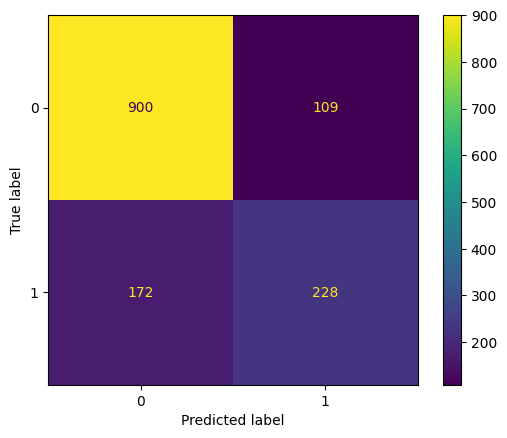

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [11]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_[0]
})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

feature_importance.head(10)

,Feature,Importance
52,Total Charges_20.1,1.453398
53,Total Charges_20.15,1.217744
1132,Total Charges_288.05,1.215633
54,Total Charges_20.2,1.195400
222,Total Charges_50.45,1.143616
190,Total Charges_45.95,1.123398
966,Total Charges_229.55,1.093743
61,Total Charges_20.55,1.072817
60,Total Charges_20.5,1.060786
49,Total Charges_19.95,1.060037


In [12]:
df["Total Charges"].dtype

dtype('O')

In [13]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

In [14]:
df["Total Charges"].isnull().sum()

np.int64(11)

In [15]:
df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)

/tmp/ipython-input-218/3001879906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)


In [16]:
df["Total Charges"] = df["Total Charges"].fillna(df["Total Charges"].median())

In [17]:
df["Total Charges"].isnull().sum()

np.int64(0)

In [18]:
df["Total Charges"].dtype

dtype('float64')

In [19]:
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object')

In [20]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [21]:
X = df_encoded.drop("Churn Value", axis=1)
y = df_encoded["Churn Value"]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1009
           1       0.68      0.58      0.63       400

    accuracy                           0.80      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.80      0.80      0.80      1409



In [27]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1009
           1       0.54      0.81      0.65       400

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.80      0.75      0.76      1409



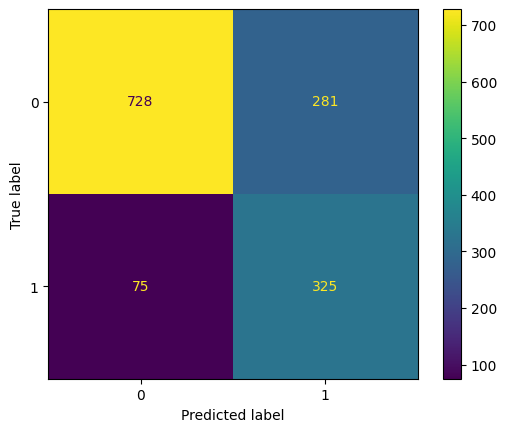

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [29]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_[0]
})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

feature_importance.head(10)

,Feature,Importance
2,Total Charges,0.693118
10,Internet Service_Fiber optic,0.236979
26,Paperless Billing_Yes,0.176596
28,Payment Method_Electronic check,0.145554
5,Partner_Yes,0.123680
9,Multiple Lines_Yes,0.115318
1,Monthly Charges,0.107040
8,Multiple Lines_No phone service,0.080497
21,Streaming TV_Yes,0.065258
23,Streaming Movies_Yes,0.061468


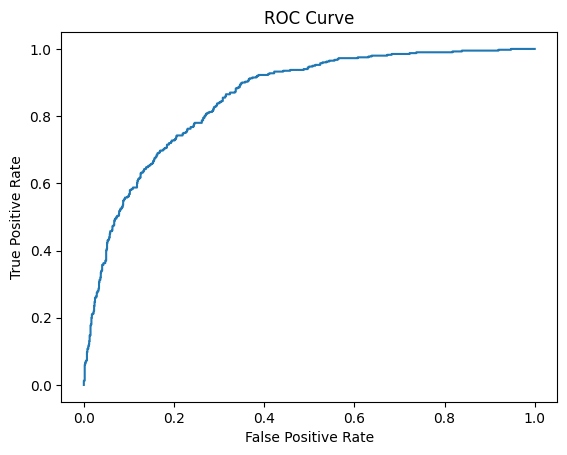

AUC Score: 0.8549318632309217


In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_prob))

In [31]:
import pickle

with open("churn_model.pkl", "wb") as f:
    pickle.dump(model, f)